<a href="https://colab.research.google.com/github/helookscool/DEEP_Learning_Machine_129/blob/main/LSTM%EC%9D%84_%ED%99%9C%EC%9A%A9%ED%95%B4_%EC%A3%BC%EA%B0%80_%EC%98%88%EC%B8%A1_%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : LSTM을 활용해 주가 예측 모델 구현하기

 **프로세스 파이프라인**

- FinanceDataReader를 활용하여 주가 데이터 받아오기
- TensorFlow Dataset 클래스를 활용하여 주가 데이터 구축
- LSTM 을 활용한 주가 예측 모델 구축

## Step 1. 데이터 불러오기 및 EDA

### 01. 필요한 모듈 import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

### 02. FinanceDataReader import

**FinanceDataReader**는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지
- [GitHub Repo](https://github.com/FinanceData/FinanceDataReader)

In [ ]:
!pip install finance-datareader

In [ ]:
import FinanceDataReader as fdr

### 03. 삼성전자 데이터 불러오기

In [ ]:
# 삼성전자(005930) 전체 (1996-11-05 ~ 현재)
samsung = fdr.DataReader('005930')

삼성전자 주가 데이터를 `DataFrame`형식으로 받아옵니다.

기본 **오름차순 정렬**이 된 데이터임을 알 수 있습니다.

### 컬럼 설명

- `Open`:   시가
- `High`:   고가
- `Low`:    저가
- `Close`:  종가
- `Volume`: 거래량
- `Change`: 대비

### 04. 삼성전자 데이터 EDA

In [ ]:
samsung.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-19,73500,74400,73100,73100,22166298,-0.010825
2021-08-20,73500,73900,72500,72700,22364803,-0.005472
2021-08-23,73300,74000,73000,73300,19384648,0.008253
2021-08-24,73900,75700,73900,75600,21016913,0.031378
2021-08-25,76200,76600,74900,75700,22272615,0.001323


**미국 주식 데이터**도 가져올 수 있습니다.

### 05. 애플 데이터 불러오기

In [ ]:
# Apple(AAPL), 애플
apple = fdr.DataReader('AAPL')

### 06. 애플 데이터 EDA

In [ ]:
apple.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2021-08-18,146.36,149.80,150.72,146.15,84520000.0,-0.0255
2021-08-19,146.70,145.03,148.00,144.50,85920000.0,0.0023
2021-08-20,148.19,147.44,148.50,146.78,60550000.0,0.0102
2021-08-23,149.71,148.31,150.19,147.89,59080000.0,0.0103
2021-08-24,149.62,149.45,150.86,149.15,48480000.0,-0.0006


### 07. 특정 시점(2017년) 이후 데이터 불러오기

In [ ]:
# Apple(AAPL), 2017년
apple = fdr.DataReader('AAPL', '2017')

In [ ]:
apple.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2017-01-03,29.04,28.95,29.08,28.69,115130000.0,0.0031
2017-01-04,29.00,28.96,29.13,28.94,84470000.0,-0.0014
2017-01-05,29.15,28.98,29.22,28.95,88770000.0,0.0052
2017-01-06,29.48,29.20,29.54,29.12,127010000.0,0.0113
2017-01-09,29.75,29.49,29.86,29.48,134250000.0,0.0092


### 08. 날짜를 지정하여 특정 범위(40년간) 데이터 불러오기

In [ ]:
# Ford(F), 1980-01-01 ~ 2019-12-30 (40년 데이터)
ford = fdr.DataReader('F', '1980-01-01', '2019-12-30')

In [ ]:
ford.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-03-18,1.83,1.83,1.85,1.82,3770000.0,-0.0108
1980-03-19,1.85,1.85,1.86,1.83,1560000.0,0.0109
1980-03-20,1.86,1.86,1.88,1.85,1450000.0,0.0054
1980-03-21,1.78,1.78,1.85,1.76,5020000.0,-0.0430
1980-03-24,1.71,1.71,1.75,1.66,3330000.0,-0.0393


In [ ]:
ford.tail()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2019-12-23,9.44,9.50,9.57,9.40,54800000.0,-0.0042
2019-12-24,9.47,9.44,9.49,9.43,11880000.0,0.0032
2019-12-26,9.45,9.47,9.49,9.43,28980000.0,-0.0021
2019-12-27,9.36,9.45,9.46,9.35,28270000.0,-0.0095
2019-12-30,9.25,9.34,9.35,9.23,36090000.0,-0.0118


### 09. '금'과 '달러' 데이터도 가져올 수 있습니다. 

*[GitHub 페이지 링크](https://github.com/FinanceData/FinanceDataReader) 참고

In [ ]:
gold = fdr.DataReader('ZG') # 금 선물 (ICE)
gold.head()

,Close,Open,High,Low,Volume,Change
Date,,,,,,
1980-01-02,575.5,562.5,577.0,558.0,7260.0,0.0785
1980-01-03,625.0,627.0,640.0,603.0,20750.0,0.0860
1980-01-04,603.6,609.5,621.0,573.0,2660.0,-0.0342
1980-01-07,627.0,629.0,635.0,611.0,3000.0,0.0388
1980-01-08,602.5,611.5,619.0,600.0,750.0,-0.0391


In [ ]:
usdkrw = fdr.DataReader('USD/KRW', '1995-01-01') 
usdkrw.head()

,Close,Open,High,Low,Change
Date,,,,,
1995-01-02,788.50,788.50,788.50,788.50,0.0000
1995-01-03,788.65,788.05,788.85,787.55,0.0002
1995-01-04,789.95,788.65,790.05,788.45,0.0016
1995-01-05,789.90,789.80,790.20,789.30,-0.0001
1995-01-06,791.55,789.75,791.65,789.65,0.0021


### 10. 주식 코드를 활용해 데이터 불러오기

In [ ]:
# 삼성전자 주식코드: 005930
STOCK_CODE = '005930'

In [ ]:
# fdr 라이브러리를 활용해 삼성전자 데이터를 불러오세요 
stock = fdr.DataReader(STOCK_CODE)

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1997-08-11,1286,1295,1277,1285,146290,NaN
1997-08-12,1286,1306,1281,1296,239960,0.008560
1997-08-13,1299,1349,1299,1335,262260,0.030093
1997-08-14,1322,1331,1295,1314,180450,-0.015730
1997-08-16,1295,1295,1268,1280,61350,-0.025875


In [ ]:
stock.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-08-19,73500,74400,73100,73100,22166298,-0.010825
2021-08-20,73500,73900,72500,72700,22364803,-0.005472
2021-08-23,73300,74000,73000,73300,19384648,0.008253
2021-08-24,73900,75700,73900,75600,21016913,0.031378
2021-08-25,76200,76600,74900,75700,22272615,0.001323


In [ ]:
# 인덱스를 확인해보세요.
stock.index

DatetimeIndex(['1997-08-11', '1997-08-12', '1997-08-13', '1997-08-14',
               '1997-08-16', '1997-08-18', '1997-08-19', '1997-08-20',
               '1997-08-21', '1997-08-22',
               ...
               '2021-08-11', '2021-08-12', '2021-08-13', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-23',
               '2021-08-24', '2021-08-25'],
              dtype='datetime64[ns]', name='Date', length=6000, freq=None)

## Step 2. 시계열 데이터 시각화


### 11. 인덱스가 `DatetimeIndex`로 정의되어 있다면, 연도, 월, 일을 쪼갤 수 있습니다. 데이터를 분리해보자.

In [ ]:
stock['Year'] = stock.index.year
stock['Month'] = stock.index.month
stock['Day'] = stock.index.day

In [ ]:
stock.head()

,Open,High,Low,Close,Volume,Change,Year,Month,Day
Date,,,,,,,,,
1997-08-11,1286,1295,1277,1285,146290,NaN,1997,8,11
1997-08-12,1286,1306,1281,1296,239960,0.008560,1997,8,12
1997-08-13,1299,1349,1299,1335,262260,0.030093,1997,8,13
1997-08-14,1322,1331,1295,1314,180450,-0.015730,1997,8,14
1997-08-16,1295,1295,1268,1280,61350,-0.025875,1997,8,16


### 12. 연도별, 월별 피봇테이블을 각각 구현

In [ ]:
stock.groupby(['Year', 'Month']).mean()

Open          High  ...    Change        Day
Year Month                              ...                     
1997 8       1287.882353   1302.764706  ... -0.001133  20.823529
     9       1224.652174   1238.739130  ... -0.002450  15.086957
     10      1027.230769   1045.730769  ... -0.020538  16.576923
     11       796.280000    817.440000  ...  0.005632  15.400000
     12       748.590909    778.318182  ... -0.002667  13.318182
...                  ...           ...  ...       ...        ...
2021 4      83786.363636  84150.000000  ...  0.000101  16.045455
     5      80547.368421  81105.263158  ... -0.000592  16.684211
     6      81195.454545  81590.909091  ...  0.000147  15.318182
     7      79645.454545  79963.636364  ... -0.001228  16.045455
     8      77682.352941  78400.000000  ... -0.001997  13.000000

[289 rows x 7 columns]

### 13. matplotlib을 활용해 시간에 따른 주식 가격 시계열 그래프 구현

Text(0, 0.5, 'price')

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


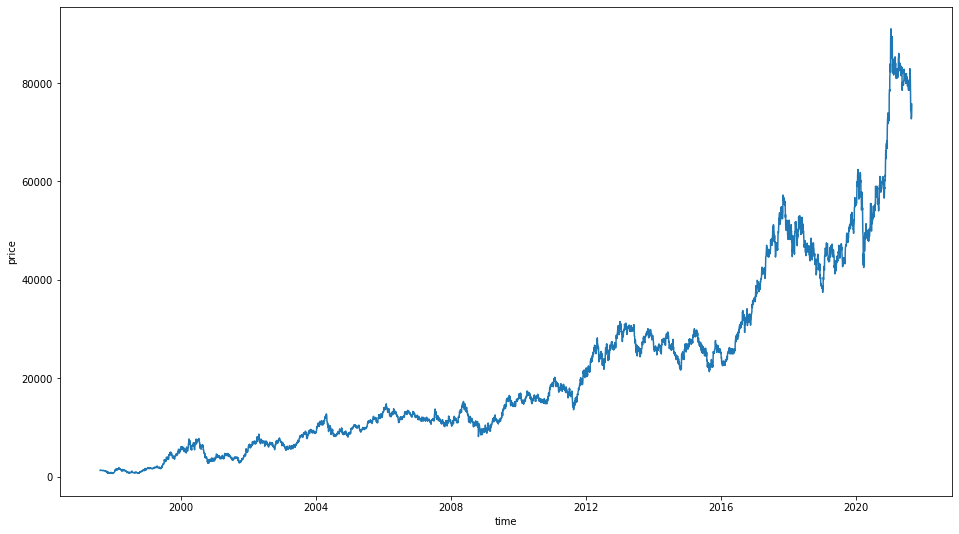

In [ ]:
plt.figure(figsize=(16, 9))
sns.lineplot(y=stock['Close'], x=stock.index)
plt.xlabel('time')
plt.ylabel('price')

### 14. subplots를 활용해 그래프 4개(2,2)를 동시에 구현

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


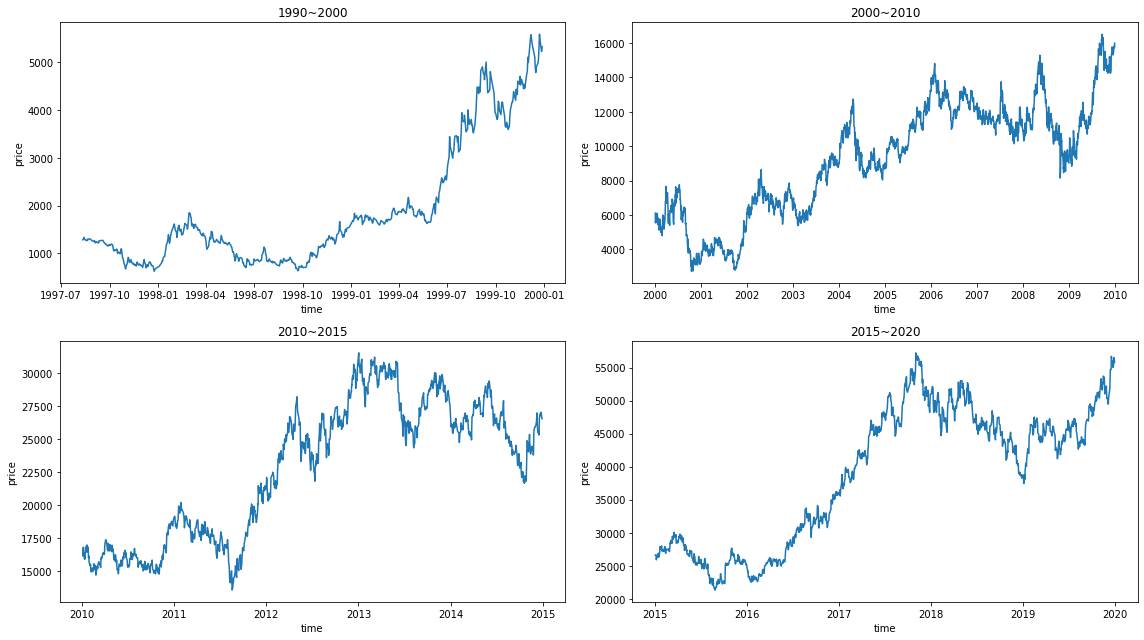

In [ ]:
# 1990~2000, 2000~2010, 2010~2015, 2015~2020
time_steps = [['1990', '2000'], 
              ['2000', '2010'], 
              ['2010', '2015'], 
              ['2015', '2020']]

fig, axes = plt.subplots(2, 2)
fig.set_size_inches(16, 9)
for i in range(4):
    ax = axes[i//2, i%2] #축을 지정해주겠다는 뜻임
    df = stock.loc[(stock.index > time_steps[i][0]) & (stock.index < time_steps[i][1])]
    #stock.loc로 조건문을 걸어줄수 있다함.  time_steps[0][0]이면 
    #자료의 가장 처음부터 처음까지라는 뜻임. ['1990', '2000']임
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)
    ax.set_title(f'{time_steps[i][0]}~{time_steps[i][1]}')
    ax.set_xlabel('time')
    ax.set_ylabel('price')
plt.tight_layout()
plt.show()

## Step 3. 시계열 데이터의 전처리

### 15. MinMaxScaler를 활요해 데이터 전처리를 수행합니다.

주가 데이터에 대하여 딥러닝 모델이 더 잘 학습할 수 있도록 **정규화(Normalization)**를 해주도록 하겠습니다.

**표준화 (Standardization)**와 **정규화(Normalization)**에 대한 내용은 아래 링크에서 더 자세히 다루니 참고.

- [데이터 전처리에 관하여](https://teddylee777.github.io/scikit-learn/scikit-learn-preprocessing)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
# 스케일 후 columns
scaled = scaler.fit_transform(stock[scale_cols])
scaled

array([[0.01424142, 0.0133781 , 0.01426816, 0.00728094, 0.00161993],
       [0.01424142, 0.01349174, 0.01431285, 0.00740265, 0.00265718],
       [0.01438538, 0.01393595, 0.01451397, 0.0078342 , 0.00290412],
       ...,
       [0.81173865, 0.76446281, 0.81564246, 0.80414504, 0.21465473],
       [0.81838317, 0.78202479, 0.82569832, 0.82959512, 0.23272952],
       [0.84385382, 0.79132231, 0.83687151, 0.83070165, 0.24663446]])

스케일이 완료된 column으로 새로운 데이터프레임을 생성합니다.

**시간 순으로 정렬**되어 있으며, datetime index는 제외했습니다.

*6,000개의 row, 5개 column*으로 이루어진 데이터셋이 DataFrame으로 정리되었습니다.

In [ ]:
# 아래 코드는 그대로 실행해주세요.
df = pd.DataFrame(scaled, columns=scale_cols)

### 16. 모델 학습을 위해 train 데이터와 test 데이터로 분할해주세요.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Close 컬럼이 예측할 데이터입니다.
# test_size는 0.2, random_state는 0으로 지정해주세요.
# shuffle을 수행하지 않습니다.
x_train, x_test, y_train, y_test = train_test_split(df.drop('Close', 1), 
                                                    df['Close'], test_size=0.2, random_state=0, shuffle=False)
#df.drop('Close', 1)은 Close칼럼만 빼고 나머지를 다 가져오라는 뜻임. 1은 axis =1을 뜻함. 콜럼.

### 17. train 데이터와 test 데이터의 shape을 각각 살펴봅니다.

In [ ]:
x_train.shape, y_train.shape

((4800, 4), (4800,))

In [ ]:
x_test.shape, y_test.shape

((1200, 4), (1200,))

In [ ]:
x_train

,Open,High,Low,Volume
0,0.014241,0.013378,0.014268,0.001620
1,0.014241,0.013492,0.014313,0.002657
2,0.014385,0.013936,0.014514,0.002904
3,0.014640,0.013750,0.014469,0.001998
4,0.014341,0.013378,0.014168,0.000679
...,...,...,...,...
4795,0.354596,0.335950,0.356872,0.002762
4796,0.375637,0.351240,0.372514,0.006546
4797,0.376523,0.354545,0.377654,0.005769
4798,0.365449,0.348967,0.363799,0.005602


### 18. TensroFlow Dataset을 활용해 시퀀스 데이터셋을 함수로 구현해주세요

dataset 클래스는? 

- batch구성
- 전처리 함수 맴핑
- shuffle
- window 데이터셋 구성
- prefetch 옵션 등
--> 데이터 파이프라인을 구성함에 있어 매우 유용한 클래스임.

tf.data.Dataset.from_tensor_slices(x)

- numpy array를 Dataset으로 변환하게 해주는 내장함수, x에 numpy array를 넣어주면 됨. 

tf.data.Dataset.window

- 윈도우를 가지는 데이터 셋으로 구성
- window(size = 3)

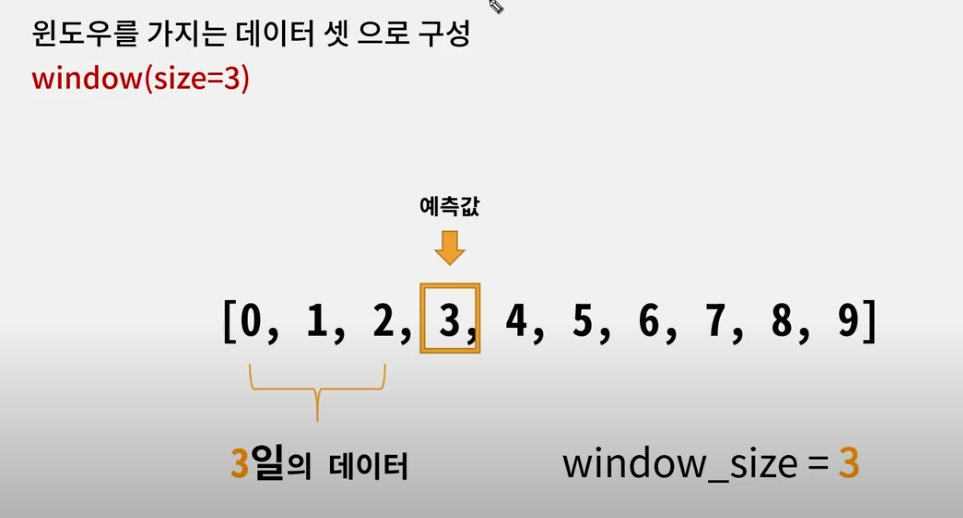

tf.data.Dataset.window
- window(size=5, stride=1)


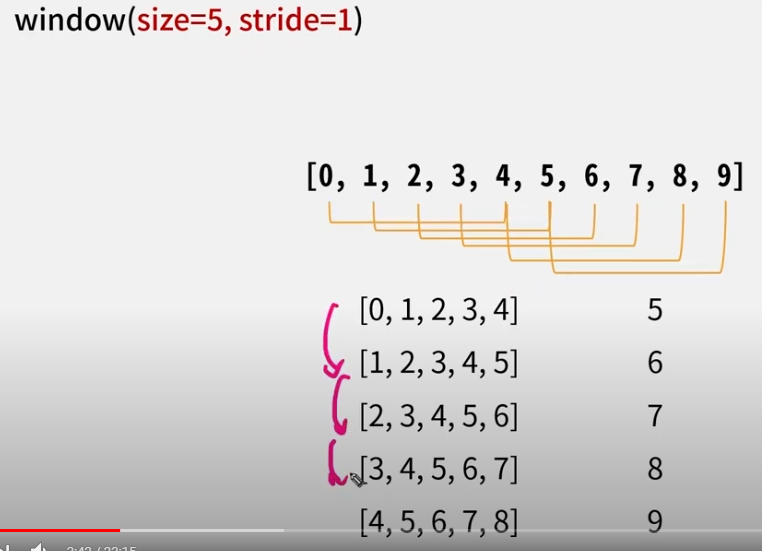

tf.data.Dataset.window

window(size=5, stride=2)

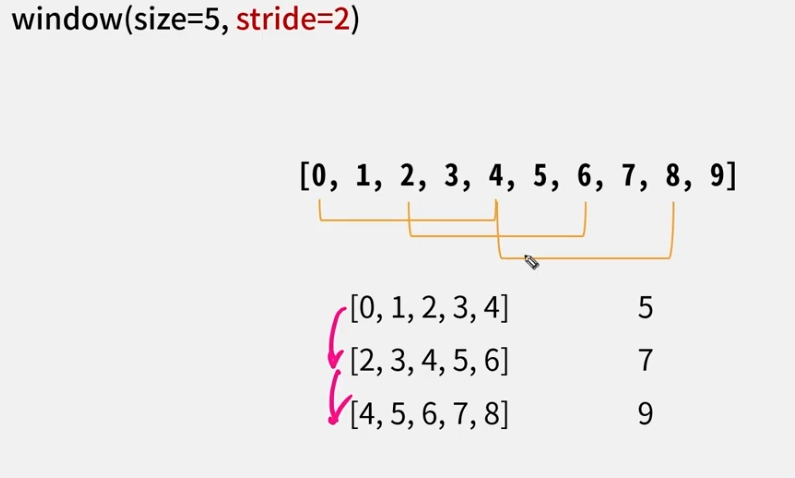

 tf.data.Dataset.shuffle(buffer_size)
 
 shuffle(buffer_size)
 30,000개의 데이터, buffer_size=1,000라면?

 1. 0~999 인덱스 사이에서 랜덤추출
 2. 추출된 데이터셋을 제외 후
 3. 다음 1000번째 인덱스부터 후보군(buffer)을 보강

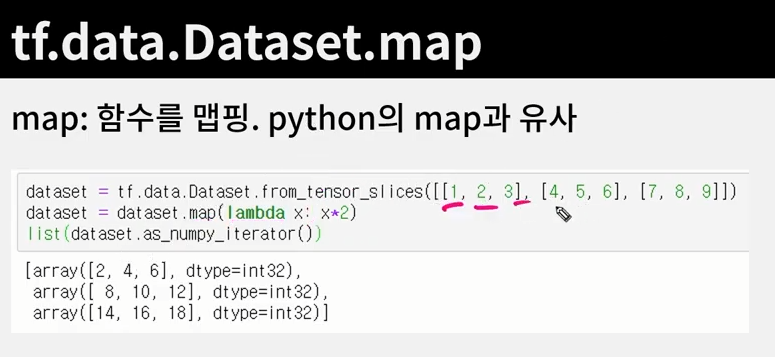

tf.data.Dataset.flat_map

flat_map:
- map과 함수를 맵핑한다는 점은 유사하지만, 결 과를 flat하게 준다.
-return값은 반드시 Dataset object여야 합니다. 

In [ ]:
#tf.data.Dataset.flat_map 예시
import tensorflow as tf

def test_func(x):
  tf.print(x)
  return tf.data.Dataset.from_tensor_slices(x) #리턴값은 반드시 Dataset object여야함.

dataset = tf.data.Dataset.from_tensor_slices([[1,2,3], [4,5,6],[7,8,9]])
dataset = dataset.flat_map(test_func)
list(dataset.as_numpy_iterator())
# 2차원 [[1,2,3], [4,5,6],[7,8,9]]으로 들어갔지만 flat해줘서 1차원으로 한차원 낮게 펴줌. 

[1 2 3]
[4 5 6]
[7 8 9]


[1, 2, 3, 4, 5, 6, 7, 8, 9]

tf.data.Dataset.batch

batch(batch_size,drop_reminder=false)

batch의 갯수를 입력합니다. 

dataset=tf.data.Dataset.range(8)
dataset=dataset.batch(3) 이렇게 하면
[array([0,1,2]),array([3,4,5]), array([6,7])으로 됨. 

tf.data.Dataset.prefetch

prefetch:미리 데이터를 fetch하는 개수

병렬처리를 하기 때문에 학습속도를 개선시키는 효과가 있다. 

tf.data.Dataset.zip

파이썬의 zip과 유사하다. 같은 인덱스에 있는 얘들끼리 묶어준다.

In [ ]:
#zip예시
a = tf.data.Dataset.range(1,4) # ==> [1,2,3]
b = tf.data.Dataset.range(4,7) # ==> [4,5,6]
ds = tf.data.Dataset.zip((a,b))
list(ds.as_numpy_iterator())

[(1, 4), (2, 5), (3, 6)]

In [ ]:
ds = tf.data.Dataset.zip((b,a))
list(ds.as_numpy_iterator())

[(4, 1), (5, 2), (6, 3)]

예시 끝 

------------------------------------

In [ ]:
import tensorflow as tf

In [ ]:
#윈도우드 데이터셋.... 이건 검색해서 알아보삼. 
#이 모델은 종가데이터만 가지고 과거 5, 10일치 데이터로 다음날의 주가를 예측해보는 그런거 할거임.
#series가 넘파이로 만든 종가 데이터임. 이거를 tf.data.Dataset.from_tensor_slices(series)로
#Dataset으로 변환시켜서 flat_map, shuffle,lambda 같은 Dataset의 함수를 가져다 쓸거임
def windowed_dataset(series, window_size, batch_size, shuffle): #shuffle로 트레인데이터는 섞을거고 테스트 데이터는 안섞을거임
    series = tf.expand_dims(series, axis=-1)#windowed_dataset구성을 위해 끝방향에 차원을 하나 늘려줌
    ds = tf.data.Dataset.from_tensor_slices(series) #series의 데이터셋을 클래스로 변환하는데 from_tensor_slices()라는
    #API를 쓴다함. 
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    #window를 구성할때는 예측값을 포함하는 범위까지 잘라줘야됨. 그래서 지금 window_size가 5니까, 여기에 +1해준거임. 
    #이 +1해준거를 아래에 람다로 분할해주는 코딩 할거임. 
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    #flat_map은 위의 window에 구성한 사이즈 그대로 넣어주면 됨.
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    #w[:-1] 인덱스로 -1전까지 데이터 구성해서 x(학습데이터)로 놓고, 뒤의 인덱스 -1은 y(예측데이터)로 놓자. 이거임. 
    return ds.batch(batch_size).prefetch(1)

## Step 4. 모델 구현하기

### 19. Hyperparameter를 정의하고 데이터에 적용해주세요.

In [ ]:
pd.DataFrame(y_train)

,Close
0,0.007281
1,0.007403
2,0.007834
3,0.007602
4,0.007226
...,...
4795,0.351355
4796,0.367289
4797,0.370608
4798,0.364855


In [ ]:
# 아래 코드는 그대로 실행해주세요.
WINDOW_SIZE=20  #20일치 데이터 보고 다음날 종가 예측하겠다 이거임. 
BATCH_SIZE=32 #32개씩 묶어서 학습을 하겠다 이거임. 

In [ ]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.y_train이거 종가임.
# WINDOW_SIZE와 BATCH_SIZE를 각 데이터셋에 적용해주세요.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False) #여기서 False는 셔플 안한다는 뜻임. 
#예측만 할것이므로 테스트는 셔플 안함.

In [ ]:
#확인해본다고 train_data치면 제대로 안나옴. 이거 확인할려면 for문 돌려야됨. 
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1): #반복문 다 가져오면 더러우니까 take(1)해서 한개batch만 가져왔다함. 
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


### 20. Sequential 모델을 구현합니다. 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber #손실함수임. 휴버라는데 검색해보삼. 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성합니다. filters는 32로, kernel_size는 5로 지정해주세요.
    #컨볼루션1차원은 예를들어 20일간의 주가데이터가 들어왔을때 이것에 대한 특성추출을 하기 위해서 쓴다는데?
    #컨볼루션1차원으로 어떤 주기, 어떤 패턴을 가지고 있는지 보겠다고함
    Conv1D(filters=32, kernel_size=5, #kernel_size 특성추출을 할때 몇일간의 간격으로 특성추출을 할거냐. 20일 전체로
           #특성추출을 한방에 하는게 아니라 5일씩 컨볼루션으로 특성추출을 하겠다. 이런뜻임. 
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM과 Dense 레이러를 사용해주세요. 활성함수는 각각 tanh와 relu로 지정합니다.
    LSTM(16, activation='relu'), 
    #인풋데이터가 many(1개 이상이잖음)지만 아웃풋은 다음날 주가 예상치 1개만 나오면 되니까,
    #연속된 주가데이터가 아니고 다음날 하루치만 예측하면 되니까, many to one 데이터를 다룰때는 
    Dense(16, activation="relu"),
    Dense(1),
    #Lambda(lambda x: x*20 ), 람다레이어를 통해서 람다함수를 맵핑해줄수도 있음, 이게 시계열에 종종쓰이는 경우가 있음
    #반도체처럼 특성값이 엄청나게 미세할때(0.000001 이런거) 최적화 시킬려면 0.000002에서 0.000001로 줄이는것보다
    #2에서 1로 줄이는게 더 쉽다. 고로 이런 미세한 수의 스케일을 업할때 람다를 많이 씀.전처리과정에서 업할수도 있지만
    #람다에이어로 해주면 마지막에 Dense(1)의 결과값을 *20해주는 효과가 있음. 이런식으로 람다 레이어를 마지막에 덪대기도
    #함

])

### 21. 모델을 Compile합니다. loss는 Huber 함수를 사용하고 optimizer는 Adam을 사용.

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
#콜벡 들을 정의해 보자. 
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
#모델 전체를 저장할거면 확장자를 에이치파이브로 저장하는데, 가중치만 저장하므로 ckpt로 확장자를 가져간다는데?
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 38s 42ms/step - loss: 1.2645e-04 - mse: 2.5291e-04 - val_loss: 0.0022 - val_mse: 0.0044

Epoch 00001: val_loss improved from inf to 0.00220, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 6s 39ms/step - loss: 1.9699e-05 - mse: 3.9398e-05 - val_loss: 0.0023 - val_mse: 0.0047

Epoch 00002: val_loss did not improve from 0.00220
Epoch 3/50
150/150 [==============================] - 6s 38ms/step - loss: 1.8915e-05 - mse: 3.7829e-05 - val_loss: 0.0019 - val_mse: 0.0038

Epoch 00003: val_loss improved from 0.00220 to 0.00190, saving model to tmp/ckeckpointer.ckpt
Epoch 4/50
150/150 [==============================] - 6s 39ms/step - loss: 1.7940e-05 - mse: 3.5879e-05 - val_loss: 0.0024 - val_mse: 0.0047

Epoch 00004: val_loss did not improve from 0.00190
Epoch 5/50
150/150 [==============================] - 6s 39ms/step - loss: 1.8709e-05 - mse: 3.7418e-05 - val_loss: 0.0028 - val_mse: 0.0056

Epo

## Step 5. 모델을 활용한 예측 및 결과 시각화

### 24. 저장한 ModelCheckpoint 를 불러옵니다.

In [ ]:
model.load_weights(filename)

### 25. `test_data`를 활용하여 예측을 수행합니다.

In [ ]:
pred = model.predict(test_data) 
#predict안에 넣어줄떄도 윈도우드된 데이터 셋을 넣어줘야함. 

In [ ]:
pred.shape

(1180, 1)

### 26. matplotlib을 활용해 예측 데이터를 시각화

아래 시각화 코드중 y_test 데이터에 **[20:]**으로 슬라이싱을 한 이유는

예측 데이터에서 20일치의 데이터로 21일치를 예측해야하기 때문에 test_data로 예측 시 *앞의 20일은 예측하지 않습니다.*

따라서, 20번 째 index와 비교하면 더욱 정확합니다.

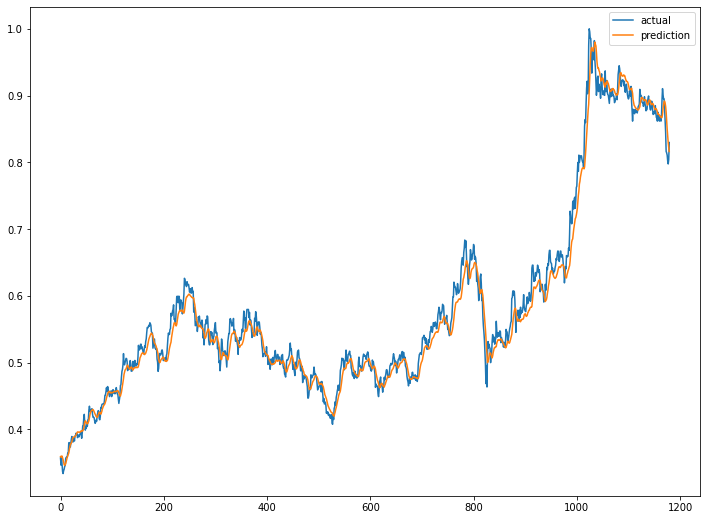

In [ ]:
# 20일치의 데이터로 21일치를 예측하므로 test_data 사용시 이전 20일은 예측하지 않습니다. 
#윈조우해준 20일의 다음날인 21이 y데이터의 첫번째 날이 됨. 
# 따라서 y_test 데이터에 [20:]로 슬라이싱해주세요.
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[20:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()

## Feature의 갯수가 여러개인 경우엔 어떻게 코딩을 해야 다음날 종가를 예측할 수 있을까?

feature 4개의 5일치 데이터로 다음날 종가 예측하기

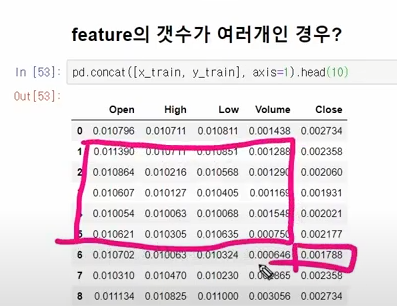

이 경우엔 x데이터와 y데이터를 각각 구성한 후에 zip함수를 통해 묶어주는 작업이 필요하다. 

In [ ]:
# X값 window dataset구성

ds_x = tf.data.Dataset.from_tensor_slices(x_train)
ds_x = ds_x.window(WINDOW_SIZE, stride=1, shift=1, drop_remainder=True)
#WINDOW_SIZE+1 안함. x데이터만 단독으로 구성할 예정이므로...윈도우 사이즈만큼 쭉 구성할거임
ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))

In [ ]:
# y값 window dataset구성
ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
#얘좀 주의해야되는데, y값이 WINDOW_SIZE에 해당하는 인덱스 부터 구성이 되므로  y_train[WINDOW_SIZE:]이렇게 해줌

In [ ]:
train_data = tf.data.Dataset.zip((ds_x, ds_y)).batch(32)

In [ ]:
for x, y in train_data.take(1):
  print(x[:3])
  print()
  print(y[:3])

In [ ]:
pd.concat([x_train, y_train], axis=1).head(10)

,Open,High,Low,Volume,Close
0,0.014241,0.013378,0.014268,0.001620,0.007281
1,0.014241,0.013492,0.014313,0.002657,0.007403
2,0.014385,0.013936,0.014514,0.002904,0.007834
3,0.014640,0.013750,0.014469,0.001998,0.007602
4,0.014341,0.013378,0.014168,0.000679,0.007226
5,0.014164,0.013378,0.014168,0.000528,0.007126
6,0.014120,0.013171,0.013966,0.000881,0.007104
7,0.014042,0.013729,0.014067,0.002415,0.007458
8,0.014319,0.013564,0.014369,0.001111,0.007303
9,0.014241,0.013440,0.014212,0.001111,0.007403


In [ ]:
def windowed_dataset(x, y, WINDOW_SIZE, batch_size, shuffle): 
    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_x = ds_x.window(WINDOW_SIZE, shift=1, stride=1, drop_remainder=True)
    ds_x = ds_x.flat_map(lambda x: x.batch(WINDOW_SIZE))
    #y값 추가
    ds_y = tf.data.Dataset.from_tensor_slices(y_train[WINDOW_SIZE:])
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    if shuffle:
        ds = ds.shuffle(1000)
    return ds.batch(batch_size).prefetch(1)

In [ ]:
train_data = windowed_dataset(x_train, y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(x_test, y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [ ]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다. 그대로 실행해보고, 데이터의 shape을 살펴보세요.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1): #반복문 다 가져오면 더러우니까 take(1)해서 한개batch만 가져왔다함. 
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 20, 4)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32,)


## Feature 여러개일때 모델구현

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber #손실함수임. 휴버라는데 검색해보삼. 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    
    Conv1D(filters=32, kernel_size=5,  
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 4]),
           #컬럼을 여러개 넣을때는 input_shape 넣을때 주의해야함. feature갯수만큼 넣어야됨
    LSTM(16, activation='relu'), 
    Dense(16, activation="relu"),
    Dense(1),
])

In [ ]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [ ]:
#콜벡 들을 정의해 보자. 
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=10)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
#모델 전체를 저장할거면 확장자를 에이치파이브로 저장하는데, 가중치만 저장하므로 ckpt로 확장자를 가져간다는데?
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [ ]:
# callbacks로 앞에서 구현한 earlystopping과 checkpoint를 지정해주세요.
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=50, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/50
150/150 [==============================] - 38s 40ms/step - loss: 3.1405e-05 - mse: 6.2809e-05 - val_loss: 0.1851 - val_mse: 0.3703

Epoch 00001: val_loss improved from inf to 0.18511, saving model to tmp/ckeckpointer.ckpt
Epoch 2/50
150/150 [==============================] - 6s 41ms/step - loss: 2.6475e-05 - mse: 5.2950e-05 - val_loss: 0.1701 - val_mse: 0.3402

Epoch 00002: val_loss improved from 0.18511 to 0.17009, saving model to tmp/ckeckpointer.ckpt
Epoch 3/50
150/150 [==============================] - 6s 40ms/step - loss: 2.3813e-05 - mse: 4.7626e-05 - val_loss: 0.1715 - val_mse: 0.3429

Epoch 00003: val_loss did not improve from 0.17009
Epoch 4/50
150/150 [==============================] - 6s 40ms/step - loss: 2.5067e-05 - mse: 5.0134e-05 - val_loss: 0.1678 - val_mse: 0.3355

Epoch 00004: val_loss improved from 0.17009 to 0.16776, saving model to tmp/ckeckpointer.ckpt
Epoch 5/50
150/150 [==============================] - 6s 40ms/step - loss: 2.3236e-05 - mse: 4.6473e-0

In [ ]:
model.load_weights(filename)

In [ ]:
pred = model.predict(test_data) 
#predict안에 넣어줄떄도 윈도우드된 데이터 셋을 넣어줘야함. 

In [ ]:
pred.shape

(1181, 1)